In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
pwd

'C:\\Users\\gadda'

In [7]:
cd C:\Users\gadda\Downloads\superbowl-history-1967-2020\demand

C:\Users\gadda\Downloads\superbowl-history-1967-2020\demand


In [8]:
train = pd.read_csv('demand tra.csv')

In [9]:
test = pd.read_csv('test (2).csv')

In [10]:
a = pd.read_csv('centers.csv')

In [11]:
b = pd.read_csv('Copy of meal_info.csv')

In [12]:
train = pd.merge(train,a,on='center_id')
train = pd.merge(train,b,on='meal_id')

In [13]:
test = pd.merge(test,a,on='center_id')
test = pd.merge(test,b,on='meal_id')

In [14]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,TYPE_C,2.0,Beverages,Thai
1,1262649,147,55,1885,159.11,159.11,0,0,TYPE_C,2.0,Beverages,Thai
2,1453211,149,55,1885,157.14,158.14,0,0,TYPE_C,2.0,Beverages,Thai
3,1262599,150,55,1885,159.14,157.14,0,0,TYPE_C,2.0,Beverages,Thai
4,1495848,151,55,1885,160.11,159.11,0,0,TYPE_C,2.0,Beverages,Thai


In [15]:
train.head()

,id,weeks,center_id,meal_id,checkout_price,base_price,num_orders,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,177,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,323,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,96,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,163,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,215,TYPE_C,2.0,Beverages,Thai


In [16]:
test.drop(['emailer_for_promotion'],axis=1,inplace=True)
test.drop(['homepage_featured'],axis=1,inplace=True)
train.drop(['category'],axis=1,inplace=True)
test.drop(['category'],axis=1,inplace=True)
train.drop(['base_price'],axis=1,inplace=True)
test.drop(['base_price'],axis=1,inplace=True)

In [17]:
def cusi(X):
    if X=='Indian':
        return 3
    if X=='Continental':
        return 1
    if X=='Thai':
        return 4
    if X=='Italian':
        return 2
    
train['cus']=train['cuisine'].apply(cusi)
test['cus']=test['cuisine'].apply(cusi)
train.drop(['cuisine'],axis=1,inplace=True)
test.drop(['cuisine'],axis=1,inplace=True)

In [18]:
def type(X):
    if X=='TYPE_A':
        return 1
    if X=='TYPE_B':
        return 2
    if X=='TYPE_C':
        return 3

train['type']=train['center_type'].apply(type)
test['type']=test['center_type'].apply(type)
train.drop(['center_type'],axis=1,inplace=True)
test.drop(['center_type'],axis=1,inplace=True)

In [19]:
train['n_orders'] = train['num_orders']
train.drop(['num_orders'],axis=1,inplace =True)

In [20]:
train.head()

,id,weeks,center_id,meal_id,checkout_price,op_area,cus,type,n_orders
0,1379560,1,55,1885,136.83,2.0,4,3,177
1,1018704,2,55,1885,135.83,2.0,4,3,323
2,1196273,3,55,1885,132.92,2.0,4,3,96
3,1116527,4,55,1885,135.86,2.0,4,3,163
4,1343872,5,55,1885,146.50,2.0,4,3,215


In [21]:
test.head()

,id,week,center_id,meal_id,checkout_price,op_area,cus,type
0,1028232,146,55,1885,158.11,2.0,4,3
1,1262649,147,55,1885,159.11,2.0,4,3
2,1453211,149,55,1885,157.14,2.0,4,3
3,1262599,150,55,1885,159.14,2.0,4,3
4,1495848,151,55,1885,160.11,2.0,4,3


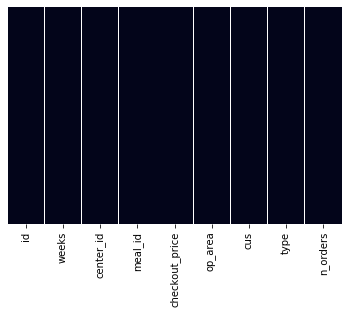

In [22]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [23]:
#sns.pairplot(data=train)

In [24]:
train.shape

(456548, 9)

In [25]:
array = train.values
x_train = array[:,0:8]
y_train = array[:,8]
y_train=y_train.astype('int')

In [26]:
array = test.values
x_test = array[:,0:8]

In [27]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [28]:
clf = DecisionTreeClassifier()

In [29]:
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [30]:
test['n_orders']=y_pred

In [31]:
test.head()

,id,week,center_id,meal_id,checkout_price,op_area,cus,type,n_orders
0,1028232,146,55,1885,158.11,2.0,4,3,271
1,1262649,147,55,1885,159.11,2.0,4,3,204
2,1453211,149,55,1885,157.14,2.0,4,3,393
3,1262599,150,55,1885,159.14,2.0,4,3,242
4,1495848,151,55,1885,160.11,2.0,4,3,54


In [32]:
test.to_csv("DecisioTreeClassifier.csv")

In [33]:
from sklearn.svm import SVC

In [34]:
from sklearn.ensemble import RandomForestRegressor
mm=RandomForestRegressor(n_jobs=-1,n_estimators=200,oob_score=True)

In [36]:
mm.fit(x_train,y_train)
y_preds=mm.predict(x_test)

In [39]:
test['n_orders'] = y_preds

In [40]:
test.head()

,id,week,center_id,meal_id,checkout_price,op_area,cus,type,n_orders
0,1028232,146,55,1885,158.11,2.0,4,3,131.590
1,1262649,147,55,1885,159.11,2.0,4,3,108.345
2,1453211,149,55,1885,157.14,2.0,4,3,104.705
3,1262599,150,55,1885,159.14,2.0,4,3,108.345
4,1495848,151,55,1885,160.11,2.0,4,3,98.215


In [42]:
test.to_csv('DecisionTreeClassifie.csv')